<a href="https://colab.research.google.com/github/aliimronf2/PCD_Assignment03/blob/main/PCD_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ditulis oleh Ali Imron Filayaty Faqih (25/562591/PPA/07068)

Task: Implement one of the segmentation methods and several operation of morphological methods without using library. Comparing the segmentation result with and without applying morphological processing.

Pada tugas ini, saya menggunakan metode Otsu untuk mencari nilai threshold optimum. Program ini dibuat secara manual, dan hanya menggunakan library Numpy untuk memproses perhitungan matematis vektor.

**Outline:**
- Segmentasi
- Erosi
- Dilasi
- Opening
- Closing
- Hit-or-Miss
- Thinning
- Thickening
- Skeletonization
- Percobaan Operasi-Operasi Morphological Methods pada Citra Grayscale
  - Erosi
  - Dilasi
  - Opening
  - Closing
  - Perbandingan Basic Morphological Operations
  - Hit-or-Miss
  - Thinning dan Thickening
  - Skeletonization

### Segmentasi

In [ ]:
# Program Metode Otsu
import numpy as np

def otsu_method(img):
  unique_values, counts = np.unique(img, return_counts=True)

  optimized_threshold = unique_values[0]

  within_class_variances = []
  for i in range(len(unique_values)):
      left_freq = counts[:i]
      left_val = unique_values[:i]
      right_freq = counts[i:]
      right_val = unique_values[i:]
      wb = sum(left_freq) / img.size
      if i == 0:
          mub = 0
          varb = 0
      else:
          mub = sum(left_val * left_freq) / sum(left_freq)
          x_minus_mub_sq = [(x - mub) ** 2 for x in left_val]
          nom_varb = [(x_minus_mub_sq[j] * left_freq[j]) for j in range(len(x_minus_mub_sq))]
          varb = round(sum(nom_varb) / sum(left_freq), 2)
      wf = sum(right_freq) / img.size
      muf = sum(right_val * right_freq) / sum(right_freq)
      x_minus_muf_sq = [(x - muf) ** 2 for x in right_val]
      nom_varf = [(x_minus_muf_sq[j] * right_freq[j]) for j in range(len(x_minus_muf_sq))]
      varf = round(sum(nom_varf) / sum(right_freq), 2)
      wcv = wb * varb + wf * varf
      within_class_variances.append(round(wcv, 2))

      # aktifkan baris berikut ini jika Anda ingin mengetahui hasil perhitungan dari setiap threshold yang dicoba
      # print(f"untuk t={unique_values[i]} adalah wb={wb}, mub={round(mub, 2)}, varb={varb} | wf={wf}, muf={round(muf, 2)}, varf={varf} | wcv={round(wcv, 2)}\n")

  min_wcv = min(within_class_variances)
  optimized_threshold_idx = within_class_variances.index(min_wcv)
  optimized_threshold = unique_values[optimized_threshold_idx]

  return optimized_threshold

In [ ]:
# Contoh penggunaan metode Otsu untuk citra grayscale sederhana
img11 = np.array([
    [0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
    [0,0,0,1,1,2,2,2,1,1,0,0,0,0,0],
    [0,0,1,2,2,3,3,3,2,2,1,0,0,0,0],
    [0,1,2,3,3,4,4,4,3,3,2,1,0,0,0],
    [0,1,2,3,4,5,5,5,4,3,2,1,0,0,0],
    [0,1,2,3,4,5,5,5,4,3,2,1,0,0,0],
    [0,1,2,3,3,4,4,4,3,3,2,1,0,0,0],
    [0,0,1,2,2,3,3,3,2,2,1,0,0,0,0],
    [0,0,0,1,1,2,2,2,1,1,0,0,0,0,0],
    [0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,2,2,1,0,0,0,0,0,0],
    [0,0,0,0,1,2,3,3,2,1,0,0,0,0,0],
    [0,0,0,0,0,1,2,2,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0]
], dtype=np.uint8)

img12 = np.array([
    [0,0,0,0,0,0,0,0,0,1,2,3,4,5,5],
    [0,0,0,0,0,0,0,1,1,2,3,4,5,5,5],
    [0,0,0,0,0,0,1,2,2,3,4,5,5,4,3],
    [0,0,0,0,0,1,2,3,3,4,5,5,4,3,2],
    [0,0,0,0,1,2,3,4,4,5,5,4,3,2,1],
    [0,0,0,1,2,3,4,5,5,5,4,3,2,1,0],
    [0,0,1,2,3,4,5,5,4,3,2,1,0,0,0],
    [0,1,2,3,4,5,5,4,3,2,1,0,0,0,0],
    [1,2,3,4,5,5,4,3,2,1,0,0,0,0,0],
    [2,3,4,5,5,4,3,2,1,0,0,0,0,0,0],
    [3,4,5,5,4,3,2,1,0,0,0,0,0,0,0],
    [4,5,5,4,3,2,1,0,0,0,0,0,0,0,0],
    [5,5,4,3,2,1,0,0,0,0,0,0,0,0,0],
    [5,4,3,2,1,0,0,0,0,0,0,0,0,0,0],
    [4,3,2,1,0,0,0,0,0,0,0,0,0,0,0]
], dtype=np.uint8)

img = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,2,3,3,3,2,1,0,0,0,0,0],
    [0,0,1,3,4,5,5,5,4,3,1,0,0,0,0],
    [0,1,3,5,5,5,4,4,5,5,3,1,0,0,0],
    [0,2,4,5,3,3,3,2,3,3,5,4,2,0,0],
    [0,3,5,5,4,3,2,1,2,3,5,5,3,0,0],
    [0,4,5,3,3,2,1,0,2,3,3,5,4,0,0],
    [0,4,5,3,3,2,0,1,3,3,3,5,4,0,0],
    [0,3,5,5,4,3,1,2,3,4,5,5,3,0,0],
    [0,2,4,5,3,3,3,2,3,4,5,4,2,0,0],
    [0,1,3,5,5,5,4,4,5,5,3,1,0,0,0],
    [0,0,1,3,4,5,5,5,4,3,1,0,0,0,0],
    [0,0,0,1,2,3,3,3,2,1,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
], dtype=np.uint8)

optimized_threshold = otsu_method(img)
print(f"Threshold optimal untuk citra tersebut adalah {optimized_threshold}")

Threshold optimal untuk citra tersebut adalah 3


In [ ]:
# Program segmentasi dengan threshold tertentu, dengan output citra biner
def segment(img, threshold, mode='normal'):
  '''
  Melakukan segmentasi pada citra grayscale sehingga menjadi citra biner

  Parameter:
  - img: citra grayscale
  - threshold
  - mode: 'normal' untuk object cerah dengan background gelap
          'inverse' untuk object gelap dengan background gelap

  Return: citra biner
  '''
  segmented = np.zeros_like(img)
  for i in range(len(img)):
    for j in range(len(img[0])):
      if mode == 'normal':
        segmented[i,j] = 1 if img[i,j] >= threshold else 0
      elif mode == 'inverse':
        segmented[i,j] = 0 if img[i,j] >= threshold else 1


  return segmented

In [ ]:
# Penggunaan fungsi segment() dengan input citra img di atas
segment_result = segment(img, optimized_threshold)

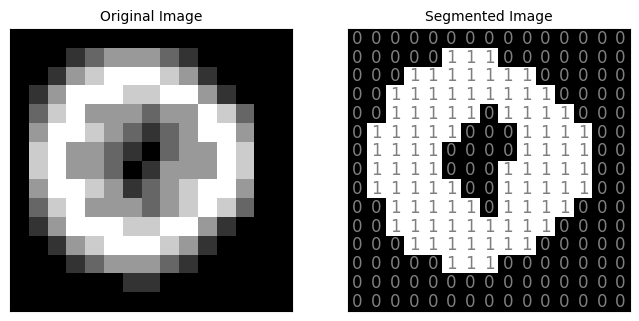

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Plot hasil ---
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
# axes = axes.ravel()

axes[0].imshow(img, cmap="gray", vmin=0, vmax=5)
axes[0].set_title("Original Image", fontsize=10)
axes[1].imshow(segment_result, cmap="gray", vmin=0, vmax=1)
axes[1].set_title("Segmented Image", fontsize=10)

# tambahkan angka di setiap sel
for i in range(segment_result.shape[0]):
    for j in range(segment_result.shape[1]):
        color = 'white' if segment_result[i, j] < 0.5 else 'black'
        axes[1].text(j, i, str(segment_result[i, j]),
                ha='center', va='center',
                color=color, alpha=0.5, fontsize=12, fontweight='normal')

# hilangkan grid, ticks, dan label sumbu
for i in range(2):
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  axes[i].set_xticklabels([])
  axes[i].set_yticklabels([])
  axes[i].grid(False)

plt.show()


In [ ]:
img2 = np.array([
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,2,3,3,3,3,3,2,0,0,0,0,0,0,0],
 [0,0,0,0,0,2,3,4,4,5,5,5,4,4,3,2,0,0,0,0,0],
 [0,0,0,0,2,3,4,5,5,5,5,5,5,5,4,3,2,0,0,0,0],
 [0,0,0,2,3,4,5,5,5,5,5,5,5,5,5,4,3,2,0,0,0],
 [0,0,2,3,4,5,5,5,5,5,5,5,5,5,5,4,3,2,0,0,0],
 [0,2,3,4,5,5,5,5,5,5,5,5,1,5,5,4,3,2,0,0,0],
 [0,3,4,5,5,5,5,5,5,5,5,5,2,5,5,5,4,3,0,0,0],
 [0,3,4,5,5,5,5,5,2,5,5,1,1,5,5,5,4,3,0,0,0],
 [0,3,4,5,5,5,5,5,2,5,5,5,1,2,5,5,4,3,0,0,0],
 [0,3,4,5,5,5,5,1,5,5,5,5,5,2,3,5,4,3,0,0,0],
 [0,3,4,5,5,5,5,2,1,5,5,5,5,2,2,5,4,3,0,0,0],
 [0,3,4,5,5,5,5,5,5,5,5,5,5,2,5,5,4,3,0,0,0],
 [0,3,4,5,5,5,5,5,1,5,5,5,5,1,5,5,4,3,0,0,0],
 [0,2,3,4,5,5,5,5,0,2,5,5,5,5,5,4,3,2,0,0,0],
 [0,0,2,3,4,5,5,5,5,5,5,5,5,5,5,4,3,2,0,0,0],
 [0,0,0,2,3,4,5,5,5,5,5,5,5,5,4,3,2,0,0,0,0],
 [0,0,0,0,2,3,4,5,5,5,5,5,5,4,3,2,0,0,0,0,0],
 [0,0,0,0,0,2,3,4,4,5,5,5,4,4,3,2,0,0,0,0,0],
 [0,0,0,0,0,0,0,2,3,3,3,3,3,2,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
], dtype=np.uint8)

optimized_threshold2 = otsu_method(img2)
segment_result2 = segment(img2, optimized_threshold2)

Selanjutnya, akan dilakukan beberapa operasi morphological methods. Program dibuat dari dasar, secara manual, dan hanya menggunakan bantuan library numpy untuk proses perhitungan matematis dan vektor.

In [ ]:
# Beberapa kernel yang dapat dipakai pada proses morfologi
# Pada contoh-contoh awal saya akan menggunakan kernel 3x3
dc = -1 # dontcare dianggap -1
square_kernel_3x3 = np.array([[1,1,1],[1,1,1],[1,1,1]])
cross_shape_kernel_3x3 = np.array([[dc,1,dc],[1,1,1],[dc,1,dc]])
x_shape_kernel_3x3 = np.array([[1,dc,1],[dc,1,dc],[1,dc,1]])
t_shape_kernel_3x3 = np.array([[1,1,1],[dc,1,dc],[dc,1,dc]])
l_shape_kernel_3x3 = np.array([[1,dc,dc],[1,dc,dc],[1,1,1]])
horizontal_kernel_3x3 = np.array([[dc,dc,dc],[1,1,1],[dc,dc,dc]])
vertical_kernel_3x3 = np.array([[dc,1,dc],[dc,1,dc],[dc,1,dc]])
def circle_kernel(size):
    """
    Membuat kernel berbentuk lingkaran berisi 1 di dalam
    dan 0 di luar dengan radius r piksel.
    """
    if size % 2 == 0:
        raise ValueError("Ukuran kernel harus ganjil (misal 3, 5, 7, 9).")

    r = size // 2
    kernel = np.zeros((size, size), dtype=np.uint8)
    for i in range(size):
        for j in range(size):
            di = abs(i - r)
            dj = abs(j - r)
            if (di + dj) <= r or (di <= r - 1 and dj <= r - 1):
                kernel[i, j] = 1
    return kernel

circle_kernel_r1 = circle_kernel(1)

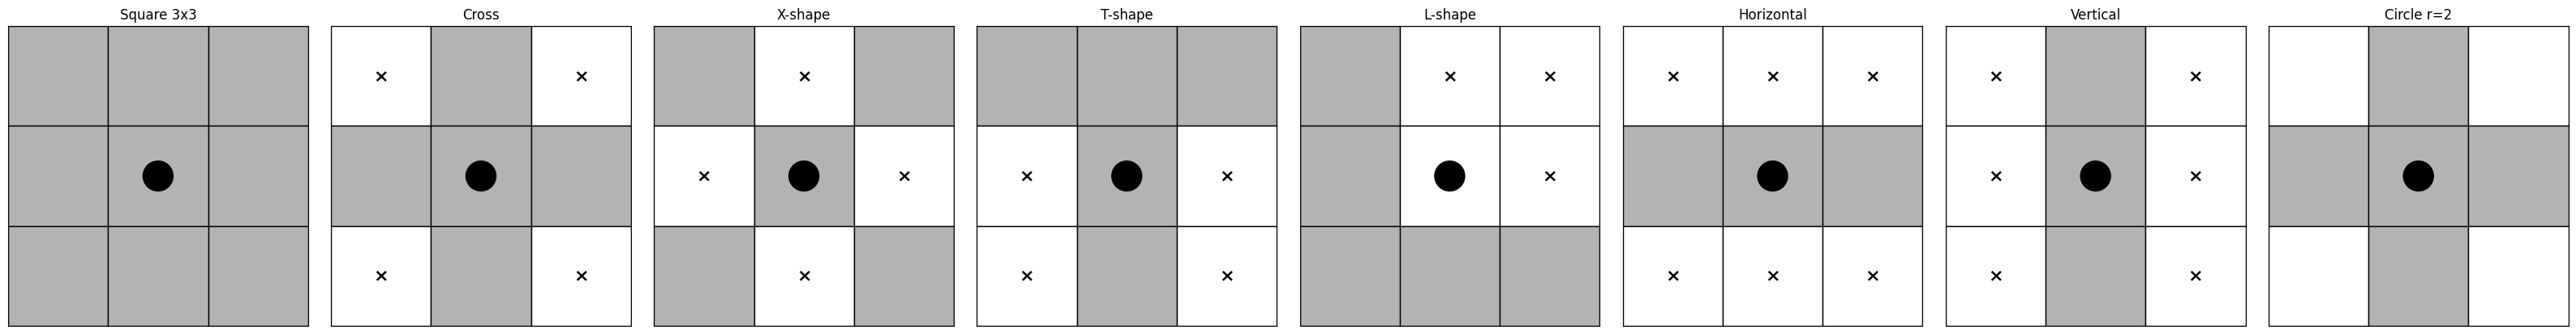

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

def plot_structuring_elements(kernels, titles=None):
    """
    Menampilkan structuring elements dalam gaya Gonzalez & Woods
    - 1: sel abu-abu
    - 0: sel putih
    - -1: don't care (sel putih + tanda ×)
    - Titik pusat (origin) ditandai dengan lingkaran kecil hitam
    """
    n = len(kernels)
    fig, axes = plt.subplots(1, n, figsize=(4*n, 4))

    if n == 1:
        axes = [axes]

    for idx, (ax, kernel) in enumerate(zip(axes, kernels)):
        rows, cols = kernel.shape
        ax.set_aspect('equal')

        for i in range(rows):
            for j in range(cols):
                val = kernel[i, j]

                # Warna latar belakang sel
                if val == 1:
                    facecolor = [0.7, 0.7, 0.7]  # abu-abu
                elif val == 0:
                    facecolor = [1, 1, 1]        # putih
                elif val == -1:
                    facecolor = [1, 1, 1]        # putih (don't care)
                else:
                    facecolor = [1, 1, 1]

                # Gambar kotak sel
                ax.add_patch(Rectangle((j - 0.5, i - 0.5), 1, 1,
                                       edgecolor='black', facecolor=facecolor, lw=1))

                # Jika don't care (-1), tambahkan tanda '×'
                if val == -1:
                    ax.text(j, i, '×', ha='center', va='center',
                            color='black', fontsize=16, fontweight='bold')

        # Tambahkan titik pusat (origin)
        cy, cx = rows // 2, cols // 2
        ax.add_patch(Circle((cx, cy), 0.15, color='black'))

        # Hilangkan ticks dan axis
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(-0.5, cols - 0.5)
        ax.set_ylim(rows - 0.5, -0.5)

        if titles:
            ax.set_title(titles[idx], fontsize=12)

    plt.tight_layout()
    plt.show()

# Tampilkan semuanya
plot_structuring_elements(
    [square_kernel_3x3, cross_shape_kernel_3x3, x_shape_kernel_3x3,
     t_shape_kernel_3x3, l_shape_kernel_3x3, horizontal_kernel_3x3,
     vertical_kernel_3x3, circle_kernel_r1],
    titles=["Square 3x3", "Cross", "X-shape", "T-shape", "L-shape",
            "Horizontal", "Vertical", "Circle r=2"]
)


### Erosi

In [ ]:
# Program operasi erosi tanpa padding
# 1. Fungsi check_for_erosion() untuk memeriksa mapping kernel pada citra
def check_for_erosion(patch, kernel):
  k, l = kernel.shape
  for i in range(k):
    for j in range(l):
      if kernel[i,j] == dc:
        continue
      if kernel[i,j] == 1 and patch[i,j] != 1:
        return False
  return True

# 2. Fungsi erode() untuk memproses erosion
def erode(segmented_img, kernel):
  m, n = segmented_img.shape
  k, l = kernel.shape
  eroded = np.zeros_like(segmented_img)

  for i in range(m - k + 1):
    for j in range(n - l + 1):
      patch = segmented_img[i:i+k, j:j+l]
      result = check_for_erosion(patch, kernel)
      if result:
        eroded[i+k//2, j+l//2] = 1

  return eroded

In [ ]:
# Sebagai contoh, saya akan melakukan erosi pada hasil segmentasi sebelumnya
# menggunakan kernel square berukuran 3x3
erosion_result = erode(segment_result, square_kernel_3x3)
# print("Citra hasil segmentasi:")
# print(segment_result)
# print("\nHasil erosi dengan kernel square:")
# print(erosion_result)

### Dilasi

In [ ]:
# Program operasi dilasi tanpa padding
# 1. Fungsi check_for_dilation() untuk memeriksa mapping kernel pada citra
def check_for_dilation(patch, kernel):
  k, l = kernel.shape
  for i in range(k):
    for j in range(l):
      if kernel[i,j] == dc:
        continue
      if kernel[i,j] == 1 and patch[i,j] == 1:
        return True
  return False

# 2. Fungsi dilate() untuk memproses dilation
def dilate(segmented_img, kernel):
  m, n = segmented_img.shape
  k, l = kernel.shape
  dilated = segmented_img.copy()

  for i in range(m - k + 1):
    for j in range(n - l + 1):
      patch = segmented_img[i:i+k, j:j+l]
      result = check_for_dilation(patch, kernel)
      if result:
        dilated[i+k//2, j+l//2] = 1

  return dilated

In [ ]:
# Sebagai contoh, saya akan melakukan dilasi pada hasil segmentasi sebelumnya
# menggunakan kernel square berukuran 3x3
dilation_result = dilate(segment_result, square_kernel_3x3)
# print("Citra hasil segmentasi:")
# print(segment_result)
# print("\nHasil dilasi dengan kernel square:")
# print(dilation_result)

### Opening

In [ ]:
# opening adalah proses erosi yang dilanjutkan dilasi menggunakan kernel yang sama
def opening(segmented_img, kernel):
  return dilate(erode(segmented_img, kernel), kernel)

In [ ]:
# Contoh opening pada hasil segmentasi sebelumnya
# menggunakan kernel square berukuran 3x3
opening_result = opening(segment_result, square_kernel_3x3)
# print("Citra hasil segmentasi:")
# print(segment_result)
# print("\nHasil opening dengan kernel square:")
# print(opening_result)

### Closing

In [ ]:
# closing adalah proses dilasi yang dilanjutkan erosi menggunakan kernel yang sama
def closing(segmented_img, kernel):
  return erode(dilate(segmented_img, kernel), kernel)

In [ ]:
# Contoh closing pada hasil segmentasi sebelumnya
# menggunakan kernel square berukuran 3x3
closing_result = closing(segment_result, square_kernel_3x3)
# print("Citra hasil segmentasi:")
# print(segment_result)
# print("\nHasil closing dengan kernel square:")
# print(closing_result)

### Penggunaan erosi, dilasi, opening, dan closing

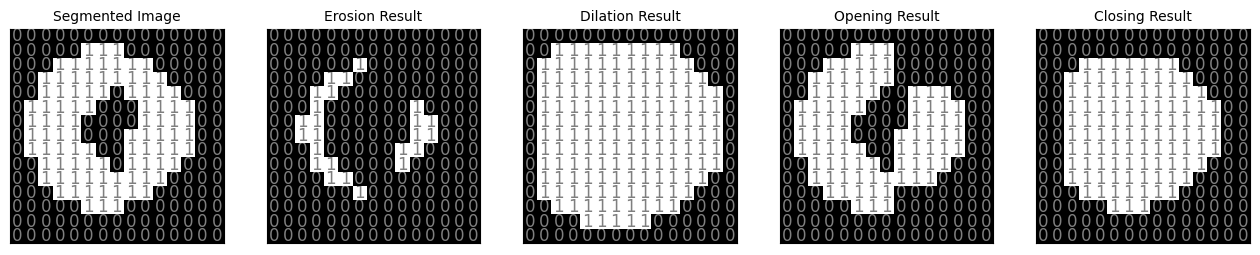

In [ ]:
# --- Plot hasil ---
fig, axes = plt.subplots(1, 5, figsize=(16, 40))
# axes = axes.ravel()

images = [segment_result, erosion_result, dilation_result, opening_result, closing_result]

axes[0].imshow(segment_result, cmap="gray", vmin=0, vmax=1)
axes[0].set_title("Segmented Image", fontsize=10)
axes[1].imshow(erosion_result, cmap="gray", vmin=0, vmax=1)
axes[1].set_title("Erosion Result", fontsize=10)
axes[2].imshow(dilation_result, cmap="gray", vmin=0, vmax=1)
axes[2].set_title("Dilation Result", fontsize=10)
axes[3].imshow(opening_result, cmap="gray", vmin=0, vmax=1)
axes[3].set_title("Opening Result", fontsize=10)
axes[4].imshow(closing_result, cmap="gray", vmin=0, vmax=1)
axes[4].set_title("Closing Result", fontsize=10)

# tambahkan angka di setiap sel
for k in range(len(axes)):
  for i in range(images[k].shape[0]):
      for j in range(images[k].shape[1]):
          color = 'white' if images[k][i, j] < 0.5 else 'black'
          axes[k].text(j, i, str(images[k][i, j]),
                  ha='center', va='center',
                  color=color, alpha=0.5, fontsize=12, fontweight='normal')

# hilangkan grid, ticks, dan label sumbu
for i in range(len(axes)):
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  axes[i].set_xticklabels([])
  axes[i].set_yticklabels([])
  axes[i].grid(False)

plt.show()

Pada perbandingan di atas, tampak bahwa
- Erosion menghilangkan bagian foreground yang tidak sama dengan kernelnya
- Dilation menambah atau mempertebal region foreground
- Opening memisahkan sebagian area foreground, dengan tetap mempertahankan luas yang sama seperti segmented image
- Closing menutup area lubang di bagian tengah, dengan output luas yang tidak jauh berbeda dengan segmented image.

### Hit-or-Miss

In [ ]:
# Program operasi hit-or-miss tanpa padding
# 1. Fungsi check_hit_or_miss() untuk memeriksa mapping kernel pada citra
def check_hit_or_miss(patch, kernel):
  k, l = kernel.shape
  for i in range(k):
    for j in range(l):
      if kernel[i,j] == dc:
        continue
      if kernel[i,j] == 1 and patch[i,j] != 1:
        return False
      if kernel[i,j] == 0 and patch[i,j] != 0:
        return False
  return True

# 2. Fungsi hit_or_miss() untuk memproses hit-or-miss
def hit_or_miss(segmented_img, kernel):
  m, n = segmented_img.shape
  k, l = kernel.shape
  output = np.zeros_like(segmented_img)

  for i in range(m - k + 1):
    for j in range(n - l + 1):
      patch = segmented_img[i:i+k, j:j+l]
      result = check_hit_or_miss(patch, kernel)
      if result:
        output[i+k//2, j+l//2] = 1

  return output

In [ ]:
# Percobaan operasi hit_or_miss pada citra sederhana dan menggunakan kernel yang diberikan pada slide
hm_kernels = [
    np.array([
        [dc,1,dc],[0,1,1],[0,0,dc]
    ], dtype=np.int8),
    np.array([
        [dc,1,dc],[1,1,0],[dc,0,0]
    ], dtype=np.int8),
    np.array([
        [dc,0,0],[1,1,0],[dc,1,dc]
    ], dtype=np.int8),
    np.array([
        [0,0,dc],[0,1,1],[dc,0,dc]
    ], dtype=np.int8),
    np.array([
        [0,0,0],[0,1,0],[0,0,0]
    ], dtype=np.int8),
    np.array([
        [dc,dc,dc],[0,1,0],[0,0,0]
    ], dtype=np.int8),
    np.array([
        [dc,1,dc],[dc,1,dc],[1,dc,1]
    ], dtype=np.int8),
    np.array([
        [dc,0,1],[1,1,0],[dc,1,dc]
    ], dtype=np.int8)
]

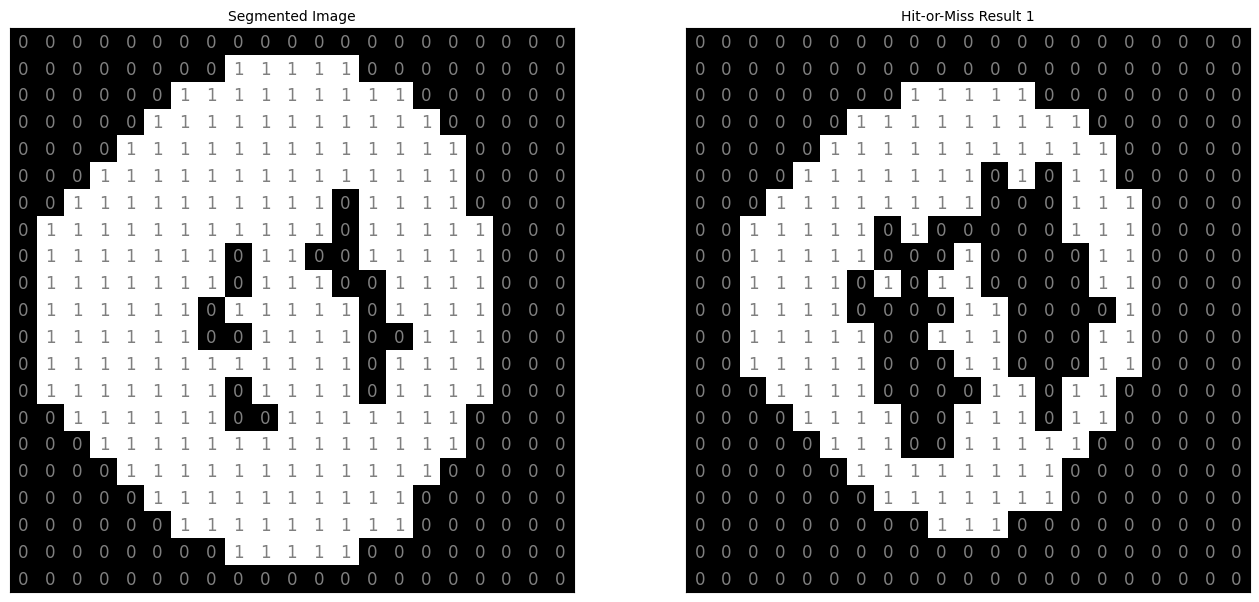

In [ ]:
import matplotlib.pyplot as plt

# Percobaan hit-or-miss dengan salah satu dari kernel di atas
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

hm_result1 = hit_or_miss(segment_result2, hm_kernels[6])

images = [segment_result2, hm_result1]

axes[0].imshow(segment_result2, cmap="gray", vmin=0, vmax=1)
axes[0].set_title("Segmented Image", fontsize=10)
axes[1].imshow(hm_result1, cmap="gray", vmin=0, vmax=1)
axes[1].set_title("Hit-or-Miss Result 1", fontsize=10)

# tambahkan angka di setiap sel
for k in range(len(axes)):
  for i in range(images[k].shape[0]):
      for j in range(images[k].shape[1]):
          color = 'white' if images[k][i, j] < 0.5 else 'black'
          axes[k].text(j, i, str(images[k][i, j]),
                  ha='center', va='center',
                  color=color, alpha=0.5, fontsize=12, fontweight='normal')

# hilangkan grid, ticks, dan label sumbu
for i in range(len(axes)):
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  axes[i].set_xticklabels([])
  axes[i].set_yticklabels([])
  axes[i].grid(False)

plt.show()

Output di atas menunjukkan hasil hit-or-miss menggunakan structuring element

$$
\begin{array}{|c|c|c|}
\hline
{} & 1 & {} \\
\hline
{} & 1 & {} \\
\hline
1 & {} & 1 \\
\hline
\end{array}
$$

dan region foreground yang bentuknya cocok dengan kernel dipertahankan.

### Thinning

In [ ]:
def thinning(segmented_img, kernels):
    """
    Operasi thinning manual:
    thin(I,J) = I - hit-or-miss(I,J)
    """
    output = segmented_img.copy()
    changed = True

    while changed:
        changed = False
        before = output.copy()

        for kernel in kernels:
            hm = hit_or_miss(output, kernel)
            m, n = output.shape

            for i in range(m):
                for j in range(n):
                    # implementasi manual X - Y = X ∩ NOT(Y)
                    if output[i, j] == 1 and hm[i, j] == 1:
                        output[i, j] = 0

        if not np.array_equal(before, output):
            changed = True

    return output

In [ ]:
# list kernel untuk thinning
dc = -1
thin_kernels = [
    np.array([
        [0,0,0],[dc,1,dc],[1,1,1]
    ], dtype=np.int8),
    np.array([
        [dc,0,0],[1,1,0],[dc,1,dc]
    ], dtype=np.int8),
    np.array([
        [1,1,1],[1,1,1],[1,1,1]
    ], dtype=np.int8),
    np.array([
        [dc,1,dc],[1,1,1],[dc,1,dc]
    ], dtype=np.int8),
    np.array([
        [0,0,0],[0,1,0],[0,dc,dc]
    ], dtype=np.int8),
    np.array([
        [0,0,0],[0,1,0],[dc,dc,0]
    ], dtype=np.int8)
]

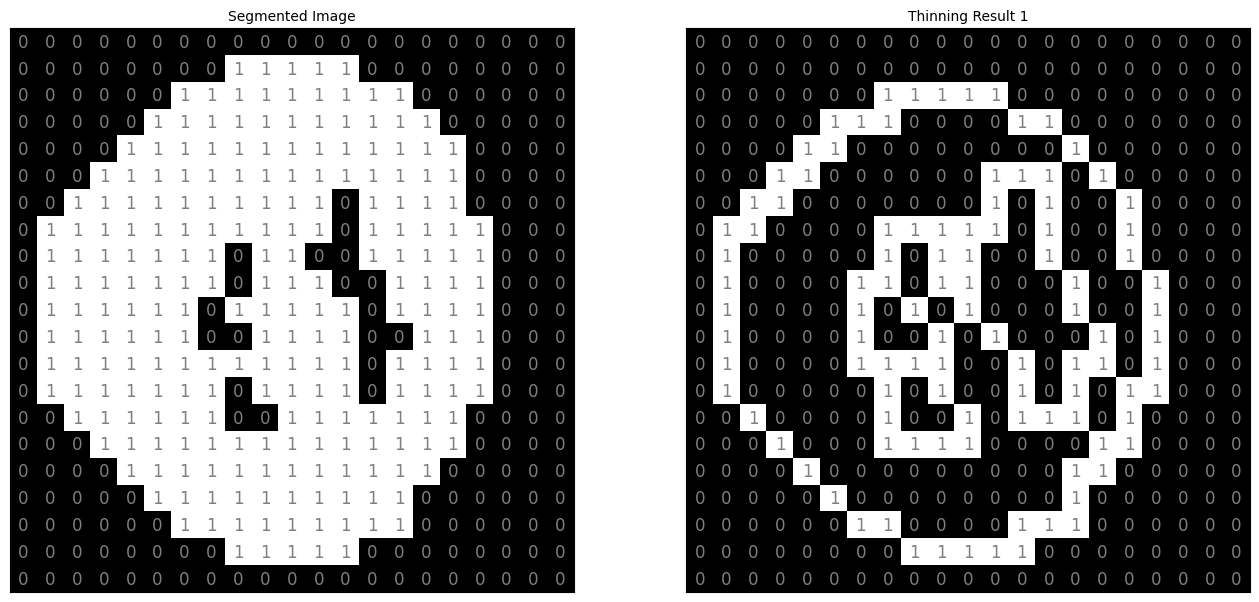

In [ ]:
# Percobaan thinning dengan kernel-kernel di atas
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

thin_result1 = thinning(segment_result2, thin_kernels)

images = [segment_result2, thin_result1]

axes[0].imshow(segment_result2, cmap="gray", vmin=0, vmax=1)
axes[0].set_title("Segmented Image", fontsize=10)
axes[1].imshow(thin_result1, cmap="gray", vmin=0, vmax=1)
axes[1].set_title("Thinning Result 1", fontsize=10)

# tambahkan angka di setiap sel
for k in range(len(axes)):
  for i in range(images[k].shape[0]):
      for j in range(images[k].shape[1]):
          color = 'white' if images[k][i, j] < 0.5 else 'black'
          axes[k].text(j, i, str(images[k][i, j]),
                  ha='center', va='center',
                  color=color, alpha=0.5, fontsize=12, fontweight='normal')

# hilangkan grid, ticks, dan label sumbu
for i in range(len(axes)):
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  axes[i].set_xticklabels([])
  axes[i].set_yticklabels([])
  axes[i].grid(False)

plt.show()

Thinning mereduksi area foreground hingga menyisakan garis-garis tepi foreground, termasuk garis tepi lubang

### Thickening

In [ ]:
def thickening(segmented_img, kernels):
    output = segmented_img.copy()
    changed = True

    while changed:
        changed = False
        for kernel in kernels:
            hm = hit_or_miss(output, kernel)
            before = output.copy()
            m, n = output.shape
            for i in range(m):
                for j in range(n):
                    if hm[i, j] == 1:
                        output[i, j] = 1
            if not np.array_equal(before, output):
                changed = True
    return output

In [ ]:
# fungsi untuk merotasi kernel
def rotate_kernel(kernel, k):
    """Rotasi kernel 90° searah jarum jam sebanyak k kali."""
    return np.rot90(kernel, k=k)

thicken_kernel_1 = np.array([
    [1,1,dc],
    [1,0,dc],
    [1,dc,0]
])

thicken_kernel_2 = np.array([
    [dc,1,1],
    [dc,0,1],
    [0,dc,1]
])

thicken_kernels = []
for base in [thicken_kernel_1, thicken_kernel_2]:
    for k in range(4):
        thicken_kernels.append(rotate_kernel(base, k))

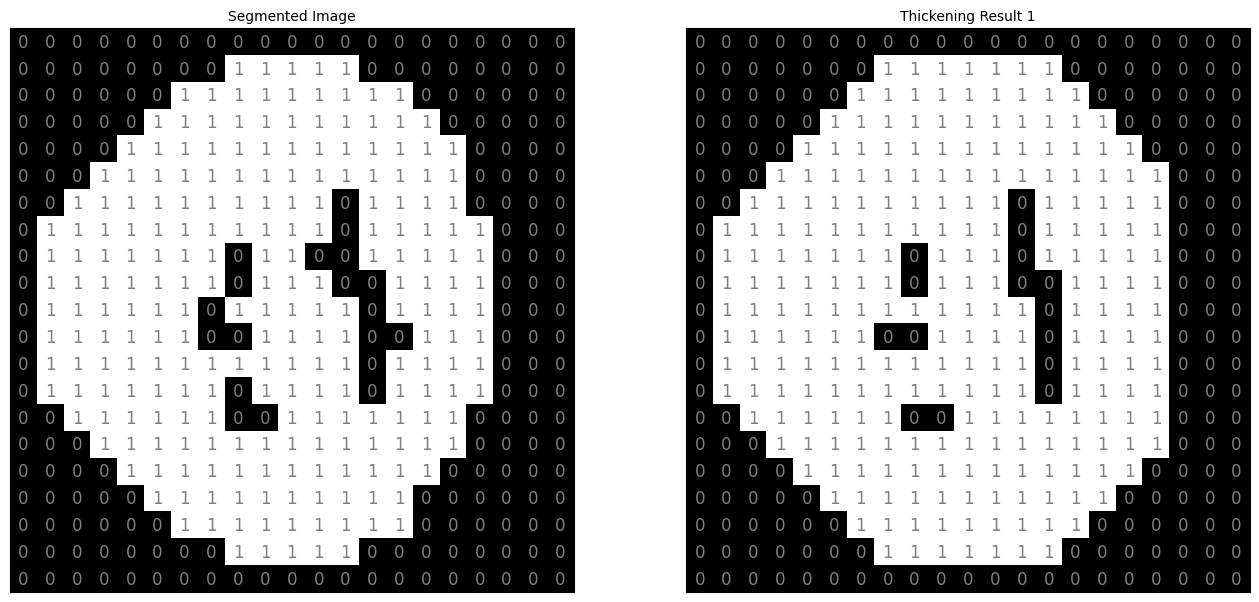

In [ ]:
# Percobaan thickening dengan kernel-kernel di atas
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

thicken_result1 = thickening(segment_result2, thicken_kernels)

images = [segment_result2, thicken_result1]

axes[0].imshow(segment_result2, cmap="gray", vmin=0, vmax=1)
axes[0].set_title("Segmented Image", fontsize=10)
axes[1].imshow(thicken_result1, cmap="gray", vmin=0, vmax=1)
axes[1].set_title("Thickening Result 1", fontsize=10)

# tambahkan angka di setiap sel
for k in range(len(axes)):
  for i in range(images[k].shape[0]):
      for j in range(images[k].shape[1]):
          color = 'white' if images[k][i, j] < 0.5 else 'black'
          axes[k].text(j, i, str(images[k][i, j]),
                  ha='center', va='center',
                  color=color, alpha=0.5, fontsize=12, fontweight='normal')

# hilangkan grid, ticks, dan label sumbu
for i in range(len(axes)):
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  axes[i].set_xticklabels([])
  axes[i].set_yticklabels([])
  axes[i].grid(False)

plt.show()

Thickening membuat area foreground bertambah tebal dan membuat holes semakin kecil

### Skeletonization

In [ ]:
def skeletonize(img, kernel):
    """
    Skeletonization berdasarkan buku DIP oleh Gonzalez & Woods:
    S = ⋃ (I ⊖ kB) - ((I ⊖ kB) ∘ B)
    """
    img = img.copy()
    skeleton = np.zeros_like(img)
    current = img.copy()

    while True:
        eroded = erode(current, kernel)
        opened = opening(eroded, kernel)

        # X - Y = X ∩ NOT(Y)
        skel_component = np.logical_and(eroded == 1, opened == 0).astype(np.uint8)
        skeleton = np.logical_or(skeleton, skel_component).astype(np.uint8)

        if np.all(eroded == 0):
            break

        current = eroded

    return skeleton

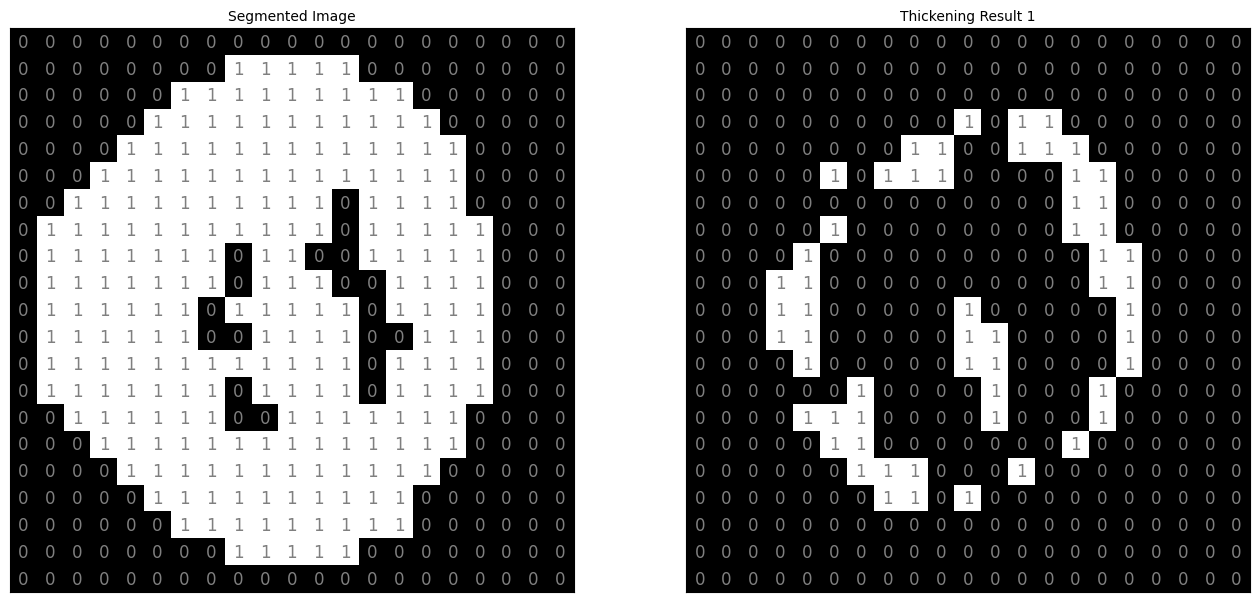

In [ ]:
# Percobaan skeletonization dengan kernel square berukuran 3x3
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

skeleton_result1 = skeletonize(segment_result2, square_kernel_3x3)

images = [segment_result2, skeleton_result1]

axes[0].imshow(segment_result2, cmap="gray", vmin=0, vmax=1)
axes[0].set_title("Segmented Image", fontsize=10)
axes[1].imshow(skeleton_result1, cmap="gray", vmin=0, vmax=1)
axes[1].set_title("Thickening Result 1", fontsize=10)

# tambahkan angka di setiap sel
for k in range(len(axes)):
  for i in range(images[k].shape[0]):
      for j in range(images[k].shape[1]):
          color = 'white' if images[k][i, j] < 0.5 else 'black'
          axes[k].text(j, i, str(images[k][i, j]),
                  ha='center', va='center',
                  color=color, alpha=0.5, fontsize=12, fontweight='normal')

# hilangkan grid, ticks, dan label sumbu
for i in range(len(axes)):
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  axes[i].set_xticklabels([])
  axes[i].set_yticklabels([])
  axes[i].grid(False)

plt.show()

Skeletonization mereduksi bagian foreground hingga tersisa garis "utama" dari struktur foreground sebelumnya yang mirip seperti tulang

## Percobaan Operasi-Operasi Morphological Methods pada Citra Grayscale

In [ ]:
%pip install gdown

In [ ]:
from PIL import Image
import gdown
import os
import numpy as np

# Fungsi untuk mengunduh file dari Google Drive
def download_image(url, output_name):
    '''
    Mengunduh citra dari Google Drive, mendeteksi ekstensi file otomatis,
    mengonversi ke citra grayscale, dan menyimpan citra ke drive
    '''

    url_lower = url.lower()
    ext = ".png" # ekstensi default
    for e in [".jpg", ".jpeg", ".png", ".tif", ".tiff"]:
        if e in url_lower:
            ext = e
            break

    # Unduh file
    temp_output = f"{output_name}{ext}"
    gdown.download(url, temp_output, quiet=False, fuzzy=True)
    img = Image.open(temp_output).convert('L')

    if ext in [".jpg", ".jpeg"]:
        output = f"{output_name}.png"
        img.save(output)
    elif ext in [".tif", ".tiff"]:
        output = f"{output_name}.tif"
        img.save(output, compression="tiff_lzw")
    else:
        output = temp_output

    # Konversi ke array
    arr_gray = np.array(img, dtype=np.uint8)

    if output != temp_output and os.path.exists(temp_output):
        os.remove(temp_output)

    return arr_gray, output


### Contoh Erosi pada Citra Grayscale

In [ ]:
url1 = "https://drive.google.com/file/d/1Q2GxMZMOsmik7A_k3tt_4lfzilyDsu98/view?usp=sharing"
arr1, output_path1 = download_image(url1, "citra1")

Downloading...
From: https://drive.google.com/uc?id=1Q2GxMZMOsmik7A_k3tt_4lfzilyDsu98
To: /content/citra1.png
100%|██████████| 30.1k/30.1k [00:00<00:00, 49.8MB/s]


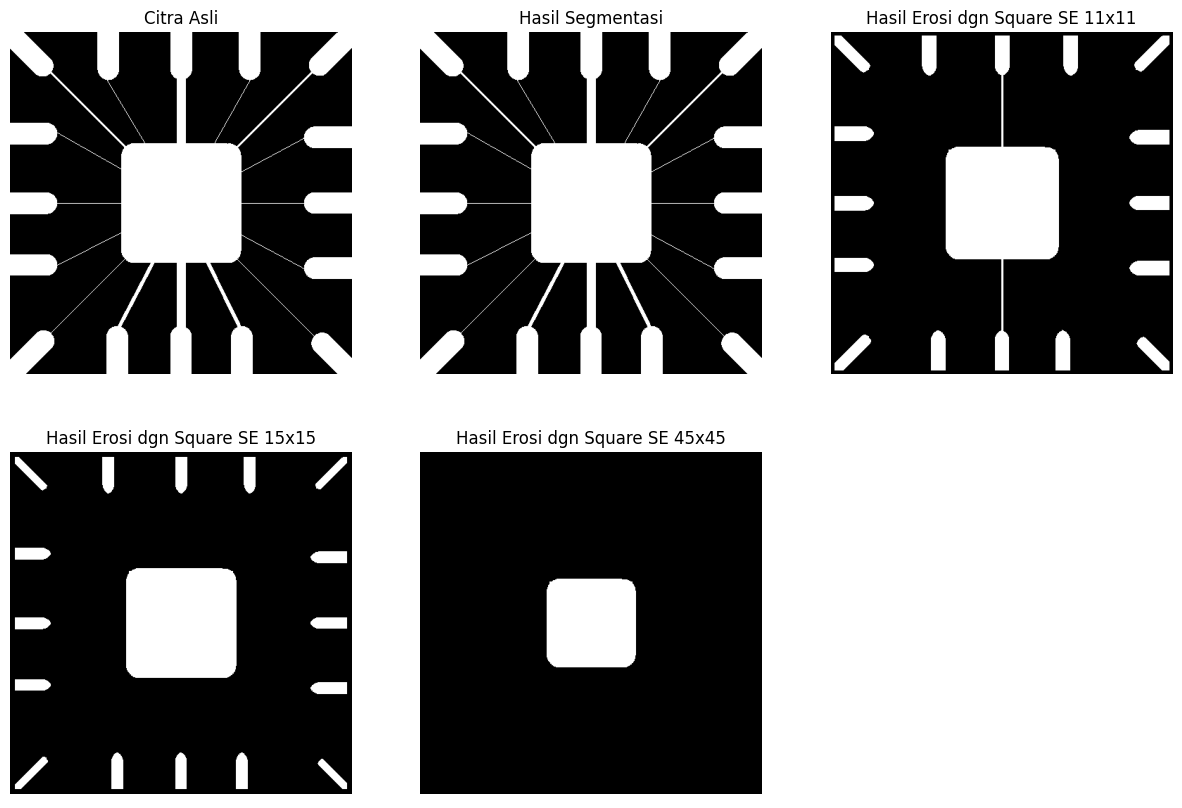

In [ ]:
# Segmentasi citra
optimum_threshold_arr1 = otsu_method(arr1)
segmented_arr1 = segment(arr1, optimum_threshold_arr1)
arr1 = segmented_arr1

# Kernel yang dipakai di erosi
sq_kernel_11 = np.ones((11, 11), dtype=np.uint8)
erosion_result_img1 = erode(arr1, sq_kernel_11)

sq_kernel_15 = np.ones((15, 15), dtype=np.uint8)
erosion_result_img2 = erode(arr1, sq_kernel_15)

sq_kernel_45 = np.ones((45, 45), dtype=np.uint8)
erosion_result_img3 = erode(arr1, sq_kernel_45)

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0][0].imshow(arr1, cmap='gray')
axs[0][0].set_title('Citra Asli')
axs[0][0].axis('off')

axs[0][1].imshow(segmented_arr1, cmap='gray')
axs[0][1].set_title('Hasil Segmentasi')
axs[0][1].axis('off')

axs[0][2].imshow(erosion_result_img1, cmap='gray')
axs[0][2].set_title('Hasil Erosi dgn Square SE 11x11')
axs[0][2].axis('off')

axs[1][0].imshow(erosion_result_img2, cmap='gray')
axs[1][0].set_title('Hasil Erosi dgn Square SE 15x15')
axs[1][0].axis('off')

axs[1][1].imshow(erosion_result_img3, cmap='gray')
axs[1][1].set_title('Hasil Erosi dgn Square SE 45x45')
axs[1][1].axis('off')

axs[1][2].axis('off')

plt.show()


Erosi di atas menggunakan structuring element berbentuk persegi berukuran 11x11, 15x15, dan 45x45. Tampak bahwa erosi mempertahankan objek dengan bentuk yang sama dengan structuring element atau kernelnya. Semakin besar ukuran structuring element, maka semakin banyak bentuk yang tidak sesuai dengannya yang dihilangkan.

### Contoh 2: Erosi pada Citra Grayscale

In [ ]:
url1b = "https://drive.google.com/file/d/1eX28pRxUsxYC6IjkEC5vY4v0DAzMEVPa/view?usp=sharing"
arr1b, output_path1b = download_image(url1b, "citra1b")

Downloading...
From: https://drive.google.com/uc?id=1eX28pRxUsxYC6IjkEC5vY4v0DAzMEVPa
To: /content/citra1b.png
100%|██████████| 361k/361k [00:00<00:00, 88.0MB/s]


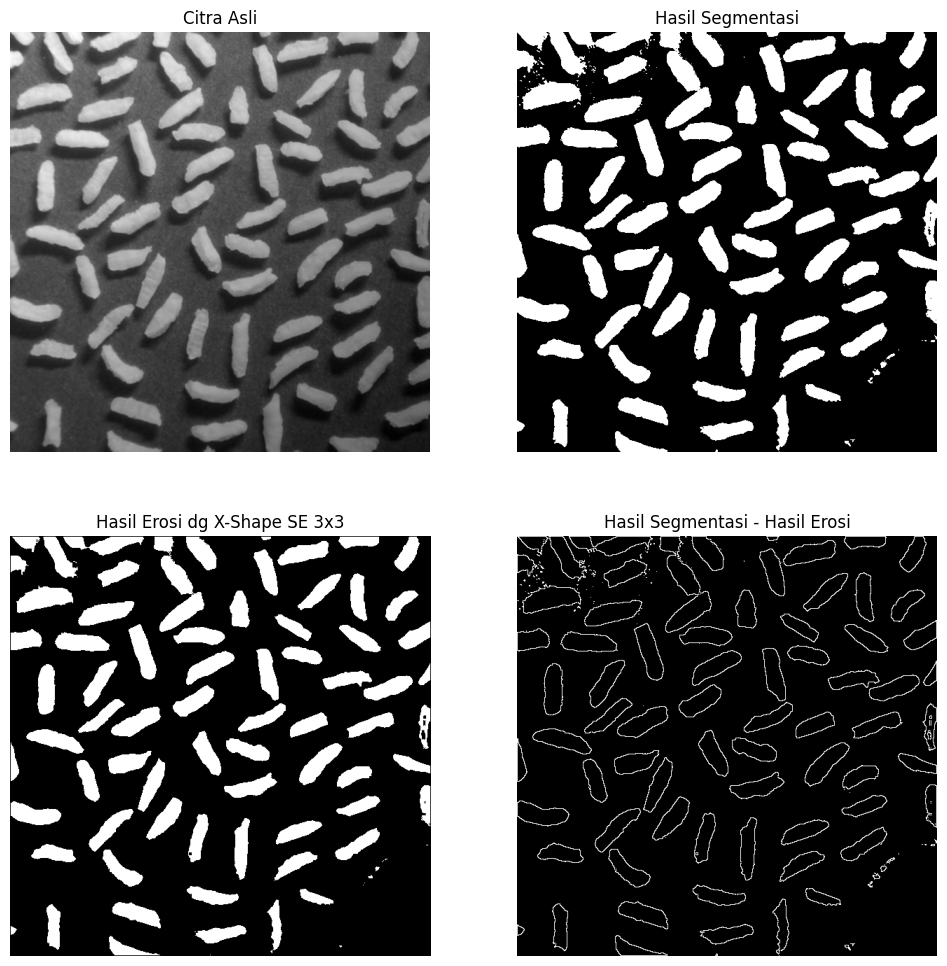

In [ ]:
# Segmentasi citra
optimum_threshold_arr1b = otsu_method(arr1b)
segmented_arr1b = segment(arr1b, optimum_threshold_arr1b)

# Erosi menggunakan kernel x-shape 3x3
erosion_result_img4 = erode(segmented_arr1b, x_shape_kernel_3x3)

erosion_result_img5 = segmented_arr1b - erosion_result_img4

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0][0].imshow(arr1b, cmap='gray')
axs[0][0].set_title('Citra Asli')
axs[0][0].axis('off')

axs[0][1].imshow(segmented_arr1b, cmap='gray')
axs[0][1].set_title('Hasil Segmentasi')
axs[0][1].axis('off')

axs[1][0].imshow(erosion_result_img4, cmap='gray')
axs[1][0].set_title('Hasil Erosi dg X-Shape SE 3x3')
axs[1][0].axis('off')

axs[1][1].imshow(erosion_result_img5, cmap='gray')
axs[1][1].set_title('Hasil Segmentasi - Hasil Erosi')
axs[1][1].axis('off')

plt.show()


Dari gambar tersebut, tampak bahwa erosi juga dapat digunakan untuk mendapatkan tepi object, dengan cara hasil segmentasi dikurangi citra hasil erosi.

### Contoh Dilasi pada Citra Grayscale

In [ ]:
url2 = "https://drive.google.com/file/d/1g3LR3KhRn8wlnRhvSwU71a_tAC-ZxXW0/view?usp=sharing"
arr2, output_path2 = download_image(url2, "citra2")

Downloading...
From: https://drive.google.com/uc?id=1g3LR3KhRn8wlnRhvSwU71a_tAC-ZxXW0
To: /content/citra2.png
100%|██████████| 28.8k/28.8k [00:00<00:00, 38.2MB/s]


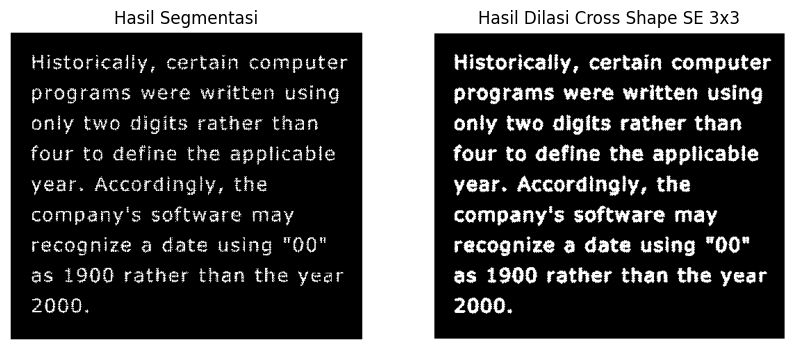

In [ ]:
# Segmentasi citra
optimum_threshold_arr2 = otsu_method(arr2)
segmented_arr2 = segment(arr2, optimum_threshold_arr2)

# Kernel yang dipakai di dilasi
dilation_result_img1 = dilate(segmented_arr2, cross_shape_kernel_3x3)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(segmented_arr2, cmap='gray')
axs[0].set_title('Hasil Segmentasi')
axs[0].axis('off')

axs[1].imshow(dilation_result_img1, cmap='gray')
axs[1].set_title('Hasil Dilasi Cross Shape SE 3x3')
axs[1].axis('off')

plt.show()

Hasil dilasi di atas menunjukkan penambahan ketebalan pada citra tulisan, sehingga bentuk huruf lebih mudah dikenali.

### Contoh 2: Dilasi pada Citra Grayscale

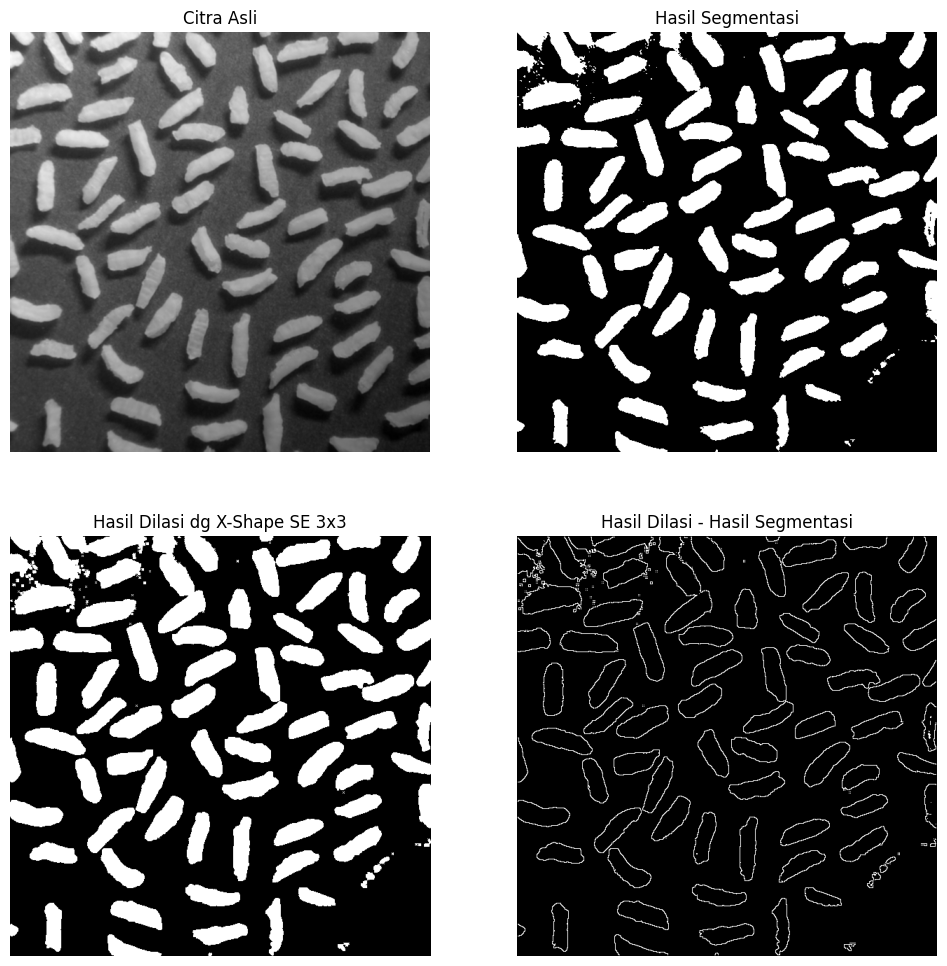

In [ ]:
# Segmentasi citra
optimum_threshold_arr1b = otsu_method(arr1b)
segmented_arr1b = segment(arr1b, optimum_threshold_arr1b)

# Kernel yang dipakai di erosi
dilation_result_img2 = dilate(segmented_arr1b, x_shape_kernel_3x3)

dilation_result_img3 = dilation_result_img2 - segmented_arr1b

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0][0].imshow(arr1b, cmap='gray')
axs[0][0].set_title('Citra Asli')
axs[0][0].axis('off')

axs[0][1].imshow(segmented_arr1b, cmap='gray')
axs[0][1].set_title('Hasil Segmentasi')
axs[0][1].axis('off')

axs[1][0].imshow(dilation_result_img2, cmap='gray')
axs[1][0].set_title('Hasil Dilasi dg X-Shape SE 3x3')
axs[1][0].axis('off')

axs[1][1].imshow(dilation_result_img3, cmap='gray')
axs[1][1].set_title('Hasil Dilasi - Hasil Segmentasi')
axs[1][1].axis('off')

plt.show()


Dilasi juga dapat digunakan untuk mendapatkan tepi object dengan cara mengurangkan hasil dilasi dengan hasil segmentasi.

### Contoh Opening pada Citra Grayscale

In [ ]:
url3 = "https://drive.google.com/file/d/15UZXXXewAmUYFyBlW8giRfY5Dx51Hv4X/view?usp=sharing"
arr3, output_path3 = download_image(url3, "citra3")

Downloading...
From: https://drive.google.com/uc?id=15UZXXXewAmUYFyBlW8giRfY5Dx51Hv4X
To: /content/citra3.png
100%|██████████| 5.77k/5.77k [00:00<00:00, 11.3MB/s]


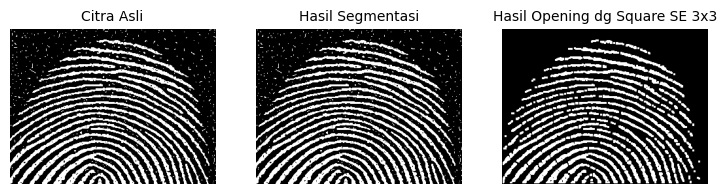

In [ ]:
# Segmentasi citra
optimum_threshold_arr3 = otsu_method(arr3)
segmented_arr3 = segment(arr3, optimum_threshold_arr3)

# Opening dengan square SE berukuran 3x3
opening_result_img1 = opening(segmented_arr3, square_kernel_3x3)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(9, 12))

axs[0].imshow(arr3, cmap='gray')
axs[0].set_title('Citra Asli', fontsize=10)
axs[0].axis('off')

axs[1].imshow(segmented_arr3, cmap='gray')
axs[1].set_title('Hasil Segmentasi', fontsize=10)
axs[1].axis('off')

axs[2].imshow(opening_result_img1, cmap='gray')
axs[2].set_title('Hasil Opening dg Square SE 3x3', fontsize=10)
axs[2].axis('off')

plt.show()


Dari plotting di atas tampak bahwa opening dapat digunakan untuk menghilangkan noise dan "jembatan kecil" yang menghubungkan dua object yang ingin dianalisis.

### Contoh Closing pada Citra Grayscale

In [ ]:
url3b = "https://drive.google.com/file/d/10yqGkK-d0G_xkMY27VjR11985yH3vnfK/view?usp=sharing"
arr3b, output_path3b = download_image(url3b, "citra3b")

Downloading...
From: https://drive.google.com/uc?id=10yqGkK-d0G_xkMY27VjR11985yH3vnfK
To: /content/citra3b.png
100%|██████████| 24.0k/24.0k [00:00<00:00, 22.0MB/s]


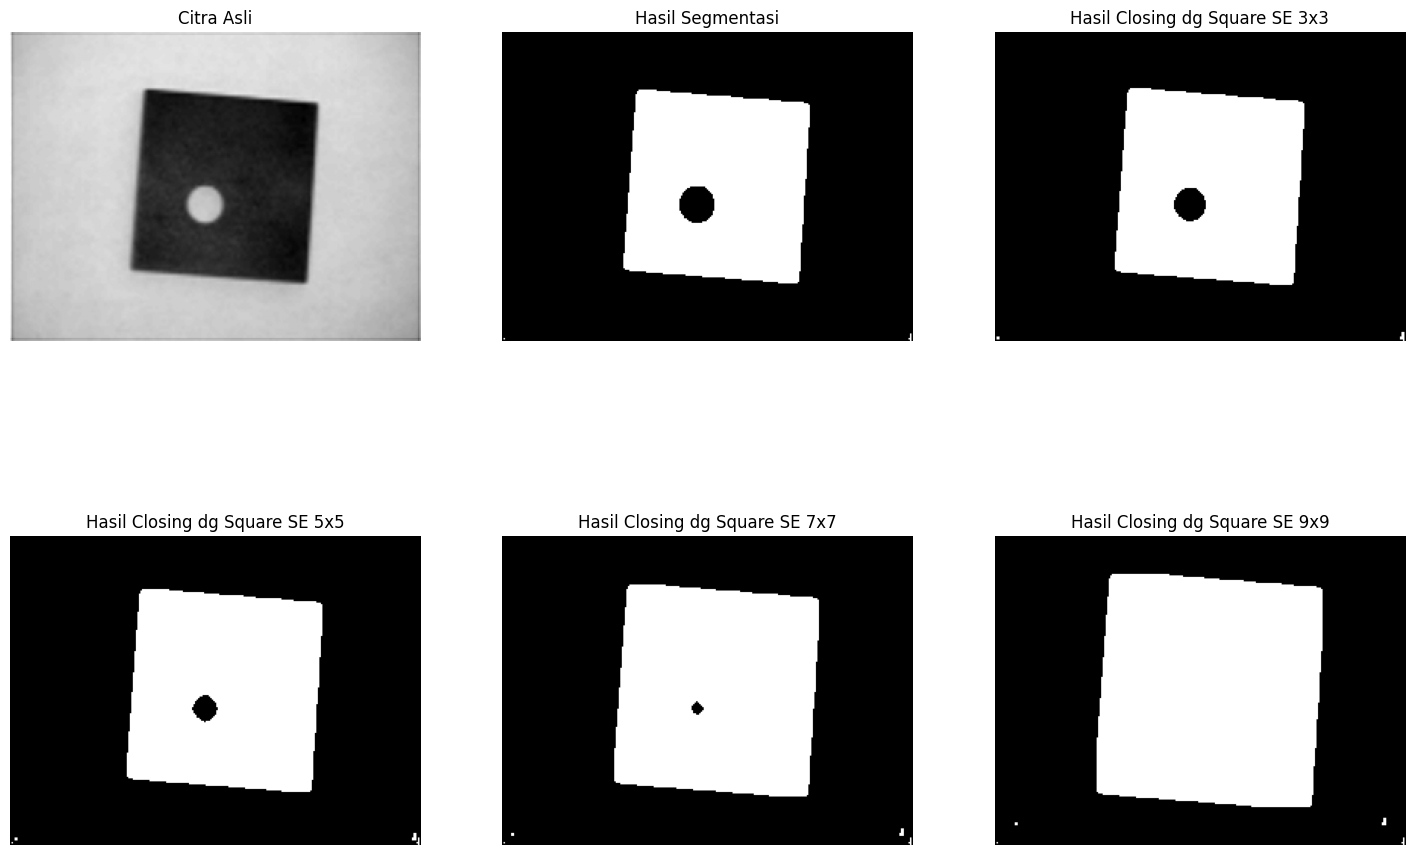

In [ ]:
# Segmentasi citra
optimum_threshold_arr3b = otsu_method(arr3b)
segmented_arr3b = segment(arr3b, optimum_threshold_arr3b, mode='inverse')

# Kernel yang dipakai di erosi
dilation_result_img2 = dilate(segmented_arr3b, square_kernel_3x3)

sq_kernel_7x7 = np.ones((7,7))
dilation_result_img3 = dilate(segmented_arr3b, sq_kernel_7x7)

sq_kernel_13x13 = np.ones((13,13))
dilation_result_img4 = dilate(segmented_arr3b, sq_kernel_13x13)

sq_kernel_27x27 = np.ones((27,27))
dilation_result_img5 = dilate(segmented_arr3b, sq_kernel_27x27)

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0][0].imshow(arr3b, cmap='gray')
axs[0][0].set_title('Citra Asli')
axs[0][0].axis('off')

axs[0][1].imshow(segmented_arr3b, cmap='gray')
axs[0][1].set_title('Hasil Segmentasi')
axs[0][1].axis('off')

axs[0][2].imshow(dilation_result_img2, cmap='gray')
axs[0][2].set_title('Hasil Closing dg Square SE 3x3')
axs[0][2].axis('off')

axs[1][0].imshow(dilation_result_img3, cmap='gray')
axs[1][0].set_title('Hasil Closing dg Square SE 5x5')
axs[1][0].axis('off')

axs[1][1].imshow(dilation_result_img4, cmap='gray')
axs[1][1].set_title('Hasil Closing dg Square SE 7x7')
axs[1][1].axis('off')

axs[1][2].imshow(dilation_result_img5, cmap='gray')
axs[1][2].set_title('Hasil Closing dg Square SE 9x9')
axs[1][2].axis('off')

plt.show()

Dari hasil plotting di atas, tampak bahwa closing dapat digunakan untuk menutup lubang dari suatu object foreground.

Namun jika ada noise di luar object, walau sedikit, noise tersebut mungkin masih ada karena closing diawali dengan dilasi, yang membuat noise "lebih tebal", sebelum akhirnya terkena erosi.

### Contoh Kombinasi Closing dan Opening pada Citra Grayscale

In [ ]:
url4 = "https://drive.google.com/file/d/1G65LRgj8SS0WADqjpRxQNYxXfavRFvM1/view?usp=sharing"
arr4, output_path4 = download_image(url4, "citra4")

Downloading...
From: https://drive.google.com/uc?id=1G65LRgj8SS0WADqjpRxQNYxXfavRFvM1
To: /content/citra4.png
100%|██████████| 31.9k/31.9k [00:00<00:00, 51.7MB/s]


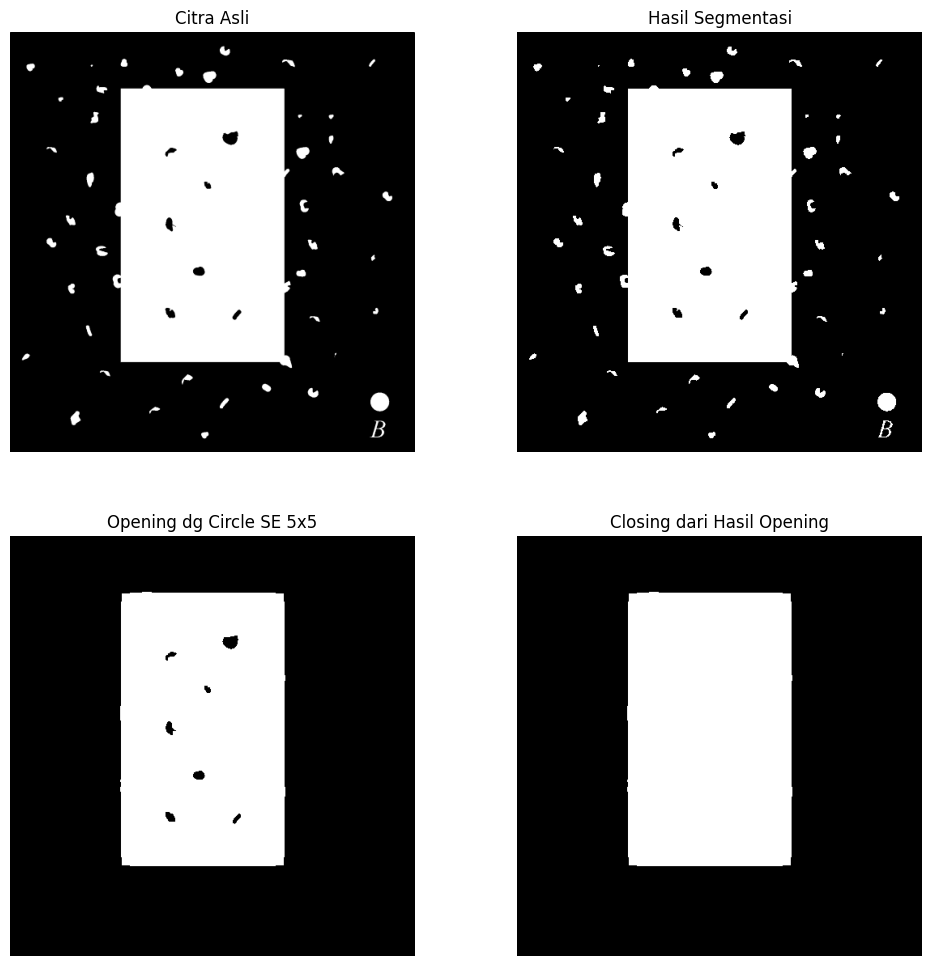

In [ ]:
# Segmentasi citra
optimum_threshold_arr4 = otsu_method(arr4)
segmented_arr4 = segment(arr4, optimum_threshold_arr4)

# Dilakukan opening dengan circle SE sebesar B (23x23)
circle_kernel_23x23 = circle_kernel(size=23)
openclos_result_img1 = opening(segmented_arr4, circle_kernel_23x23)

# lalu dilakukan closing dari hasil opening di atas
openclos_result_img2 = closing(openclos_result_img1, circle_kernel_23x23)


# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0][0].imshow(arr4, cmap='gray')
axs[0][0].set_title('Citra Asli')
axs[0][0].axis('off')

axs[0][1].imshow(segmented_arr4, cmap='gray')
axs[0][1].set_title('Hasil Segmentasi')
axs[0][1].axis('off')

axs[1][0].imshow(openclos_result_img1, cmap='gray')
axs[1][0].set_title('Opening dg Circle SE 5x5')
axs[1][0].axis('off')

axs[1][1].imshow(openclos_result_img2, cmap='gray')
axs[1][1].set_title('Closing dari Hasil Opening')
axs[1][1].axis('off')

plt.show()

Dari hasil percobaan di atas, tampak bahwa opening menghapus noise yang ada di luar object persegi panjang, sementara closing dari hasil opening mengisi lubang (filling the holes) dari citra hasil opening.

### Contoh Hit-Or-Miss pada Citra Grayscale

In [ ]:
url5 = "https://drive.google.com/file/d/1sFsAHujqQ_a7D-DT41p1z0mi9NbFrDNg/view?usp=sharing"
arr5, output_path5 = download_image(url5, "citra5")

Downloading...
From: https://drive.google.com/uc?id=1sFsAHujqQ_a7D-DT41p1z0mi9NbFrDNg
To: /content/citra5.png
100%|██████████| 263k/263k [00:00<00:00, 57.2MB/s]


In [ ]:
def display_kernel(kernel):
    kernel = np.array(kernel, dtype=np.int8)
    display_img = np.zeros_like(kernel, dtype=float)

    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            if kernel[i, j] == 1:
                display_img[i, j] = 1.0
            elif kernel[i, j] == 0:
                display_img[i, j] = 0.0
            else:
                display_img[i, j] = 0.5

    return display_img

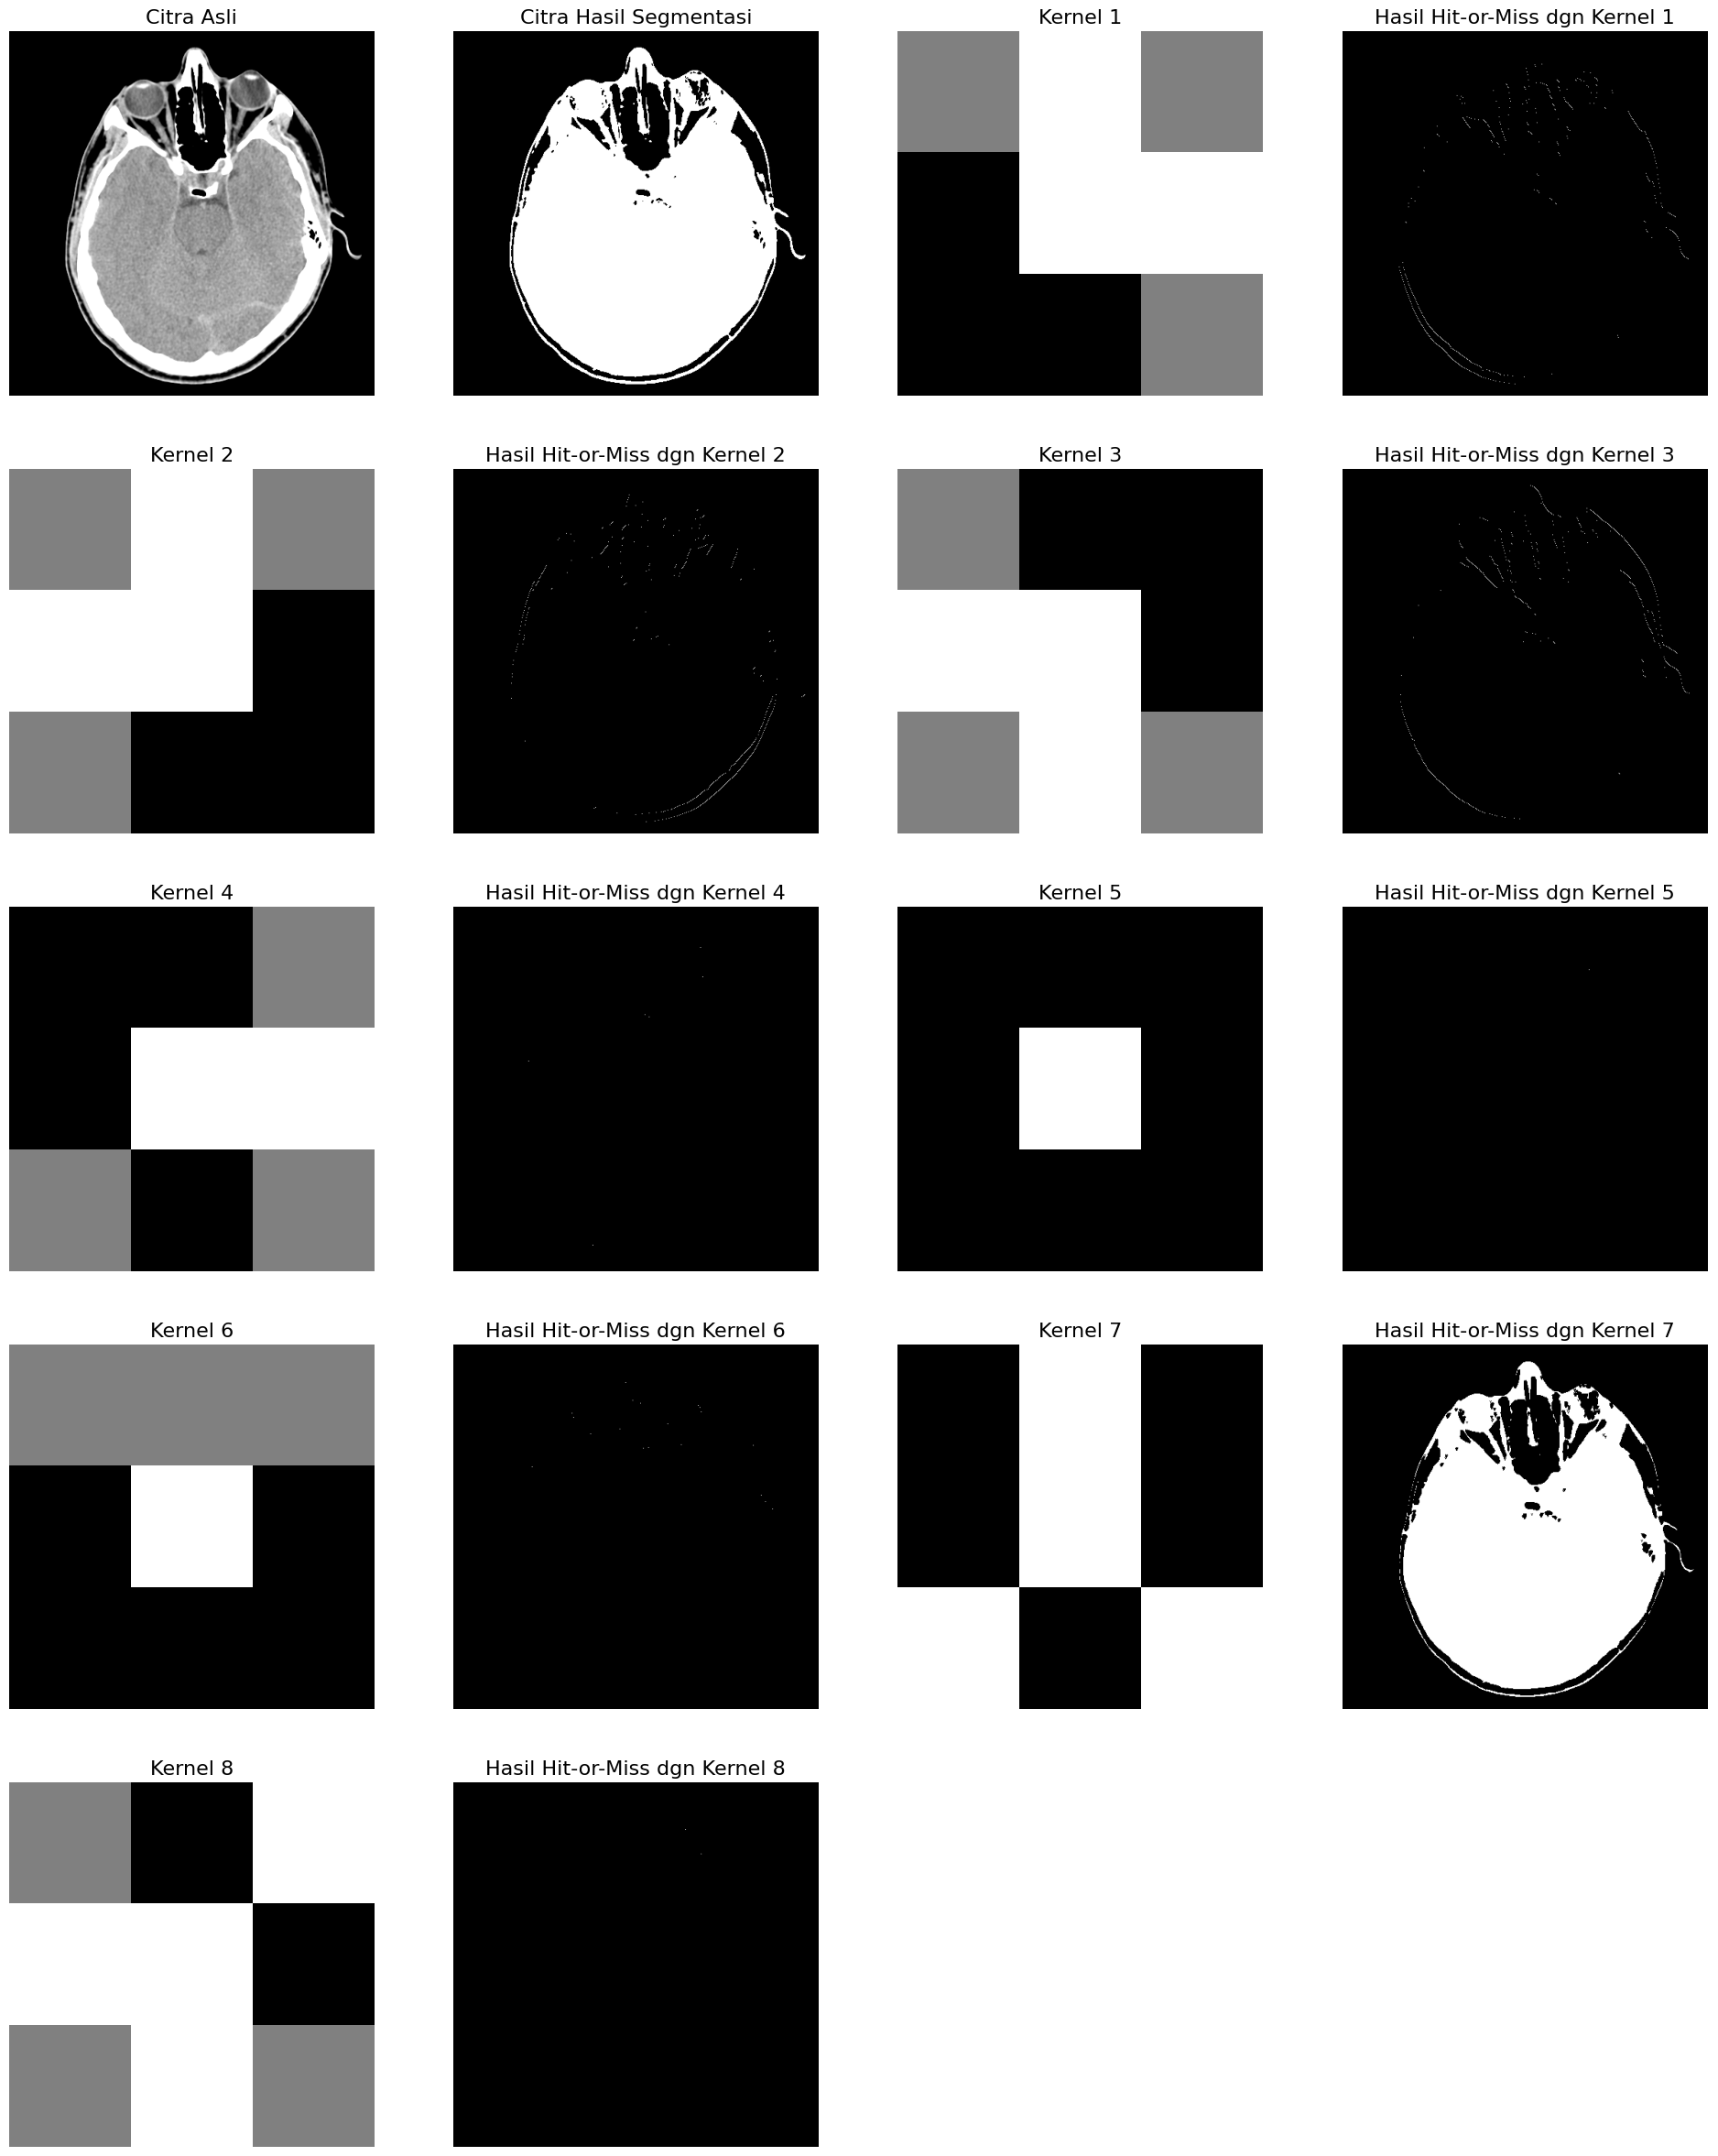

In [ ]:
# Segmentasi citra
optimum_threshold_arr5 = otsu_method(arr5)
segmented_arr5 = segment(arr5, optimum_threshold_arr5)

# menerapkan hit-or-miss dengan berbagai macam kernel
hm_result_img1 = hit_or_miss(segmented_arr5, hm_kernels[0])

hm_result_img2 = hit_or_miss(segmented_arr5, hm_kernels[1])

hm_result_img3 = hit_or_miss(segmented_arr5, hm_kernels[2])

hm_result_img4 = hit_or_miss(segmented_arr5, hm_kernels[3])

hm_result_img5 = hit_or_miss(segmented_arr5, hm_kernels[4])

hm_result_img6 = hit_or_miss(segmented_arr5, hm_kernels[5])

hm_result_img7 = hit_or_miss(segmented_arr5, hm_kernels[6])

hm_result_img8 = hit_or_miss(segmented_arr5, hm_kernels[7])

# Plotting
fig, axs = plt.subplots(5, 4, figsize=(24, 30))

axs[0][0].imshow(arr5, cmap='gray')
axs[0][0].set_title('Citra Asli', fontsize=16)
axs[0][0].axis('off')

axs[0][1].imshow(segmented_arr5, cmap='gray')
axs[0][1].set_title('Citra Hasil Segmentasi', fontsize=16)
axs[0][1].axis('off')

axs[0][2].imshow(display_kernel(hm_kernels[0]), cmap='gray')
axs[0][2].set_title('Kernel 1', fontsize=16)
axs[0][2].axis('off')

axs[0][3].imshow(hm_result_img1, cmap='gray')
axs[0][3].set_title('Hasil Hit-or-Miss dgn Kernel 1', fontsize=16)
axs[0][3].axis('off')

axs[1][0].imshow(display_kernel(hm_kernels[1]), cmap='gray')
axs[1][0].set_title('Kernel 2', fontsize=16)
axs[1][0].axis('off')

axs[1][1].imshow(hm_result_img2, cmap='gray')
axs[1][1].set_title('Hasil Hit-or-Miss dgn Kernel 2', fontsize=16)
axs[1][1].axis('off')

axs[1][2].imshow(display_kernel(hm_kernels[2]), cmap='gray')
axs[1][2].set_title('Kernel 3', fontsize=16)
axs[1][2].axis('off')

axs[1][3].imshow(hm_result_img3, cmap='gray')
axs[1][3].set_title('Hasil Hit-or-Miss dgn Kernel 3', fontsize=16)
axs[1][3].axis('off')

axs[2][0].imshow(display_kernel(hm_kernels[3]), cmap='gray')
axs[2][0].set_title('Kernel 4', fontsize=16)
axs[2][0].axis('off')

axs[2][1].imshow(hm_result_img4, cmap='gray')
axs[2][1].set_title('Hasil Hit-or-Miss dgn Kernel 4', fontsize=16)
axs[2][1].axis('off')

axs[2][2].imshow(display_kernel(hm_kernels[4]), cmap='gray')
axs[2][2].set_title('Kernel 5', fontsize=16)
axs[2][2].axis('off')

axs[2][3].imshow(hm_result_img5, cmap='gray')
axs[2][3].set_title('Hasil Hit-or-Miss dgn Kernel 5', fontsize=16)
axs[2][3].axis('off')

axs[3][0].imshow(display_kernel(hm_kernels[5]), cmap='gray')
axs[3][0].set_title('Kernel 6', fontsize=16)
axs[3][0].axis('off')

axs[3][1].imshow(hm_result_img6, cmap='gray')
axs[3][1].set_title('Hasil Hit-or-Miss dgn Kernel 6', fontsize=16)
axs[3][1].axis('off')

axs[3][2].imshow(display_kernel(hm_kernels[6]), cmap='gray')
axs[3][2].set_title('Kernel 7', fontsize=16)
axs[3][2].axis('off')

axs[3][3].imshow(hm_result_img7, cmap='gray')
axs[3][3].set_title('Hasil Hit-or-Miss dgn Kernel 7', fontsize=16)
axs[3][3].axis('off')

axs[4][0].imshow(display_kernel(hm_kernels[7]), cmap='gray')
axs[4][0].set_title('Kernel 8', fontsize=16)
axs[4][0].axis('off')

axs[4][1].imshow(hm_result_img8, cmap='gray')
axs[4][1].set_title('Hasil Hit-or-Miss dgn Kernel 8', fontsize=16)
axs[4][1].axis('off')

axs[4][2].axis('off')
axs[4][3].axis('off')

plt.show()

Plotting di atas menunjukkan hasil hit-or-miss menggunakan kernel berukuran 3x3. Tentu ukuran plotting kernel-kernel di atas bukanlah ukuran yang sebenarnya, walau tampak berukuran sama dengan citra hasil hit-or-miss.

Kernel-kernel tersebut disediakan pada slide Morphological Processing dari kelas PACD, saya plot dengan ketentuan warna putih = 1, warna hitam = 0, dan abu-abu = dc (dontcare).

Tampak bahwa hit-or-miss mempertahankan bagian region foreground yang memiliki bentuk yang sama dengan arah susunan elemen kernelnya.

### Thinning dan Thickening pada Citra Grayscale

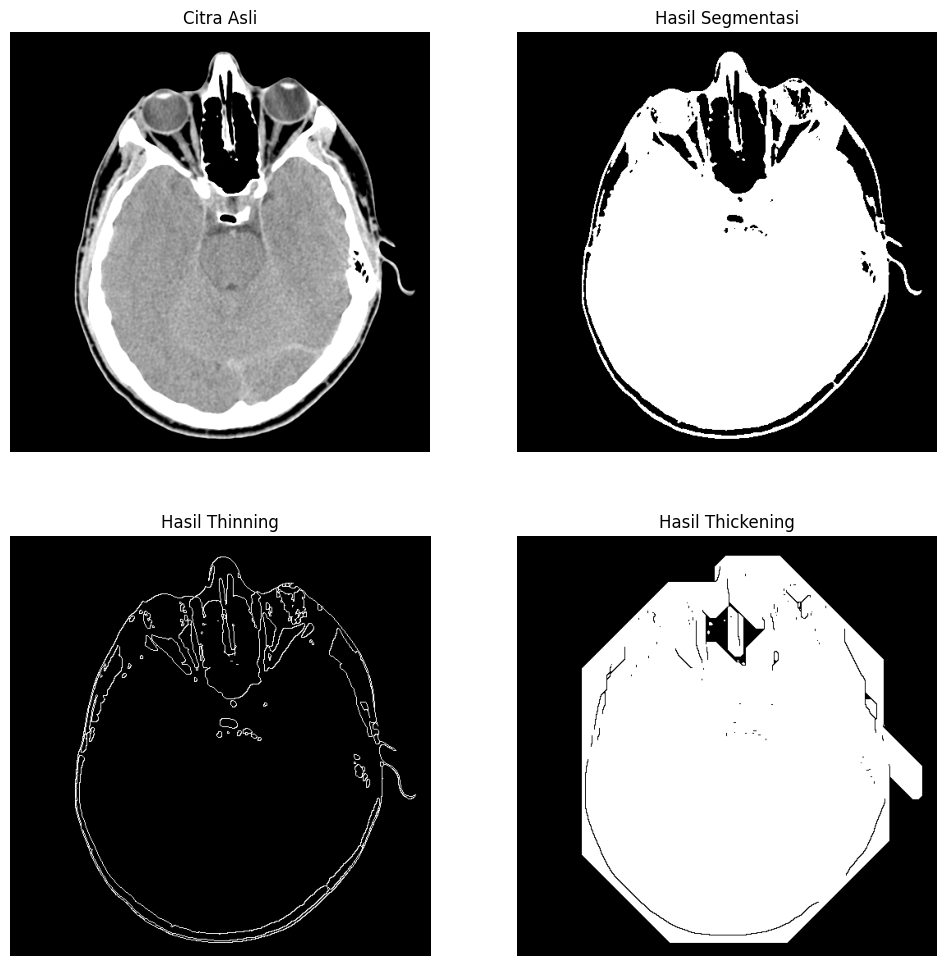

In [ ]:
# Segmentasi citra
optimum_threshold_arr5 = otsu_method(arr5)
segmented_arr5 = segment(arr5, optimum_threshold_arr5)

# menerapkan thinning dan thickening dengan berbagai macam kernel
thinning_result_img1 = thinning(segmented_arr5, thin_kernels)

thickening_result_img1 = thickening(segmented_arr5, thicken_kernels)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0][0].imshow(arr5, cmap='gray')
axs[0][0].set_title('Citra Asli')
axs[0][0].axis('off')

axs[0][1].imshow(segmented_arr5, cmap='gray')
axs[0][1].set_title('Hasil Segmentasi')
axs[0][1].axis('off')

axs[1][0].imshow(thinning_result_img1, cmap='gray')
axs[1][0].set_title('Hasil Thinning')
axs[1][0].axis('off')

axs[1][1].imshow(thickening_result_img1, cmap='gray')
axs[1][1].set_title('Hasil Thickening')
axs[1][1].axis('off')

plt.show()


Dari output di atas, tampak bahwa thinning menyisakan garis tepi dari region foreground, sementara thickening membuat area foreground bertambah tebal dan boxy (cenderung kotak).

### Contoh Skeletonization pada Citra Grayscale

In [ ]:
url6 = "https://drive.google.com/file/d/1EscRC1kapGiZLRHEAX-BYw3qIVEy-5rV/view?usp=sharing"
arr6, output_path6 = download_image(url6, "citra6")

Downloading...
From: https://drive.google.com/uc?id=1EscRC1kapGiZLRHEAX-BYw3qIVEy-5rV
To: /content/citra6.png
100%|██████████| 34.8k/34.8k [00:00<00:00, 40.7MB/s]


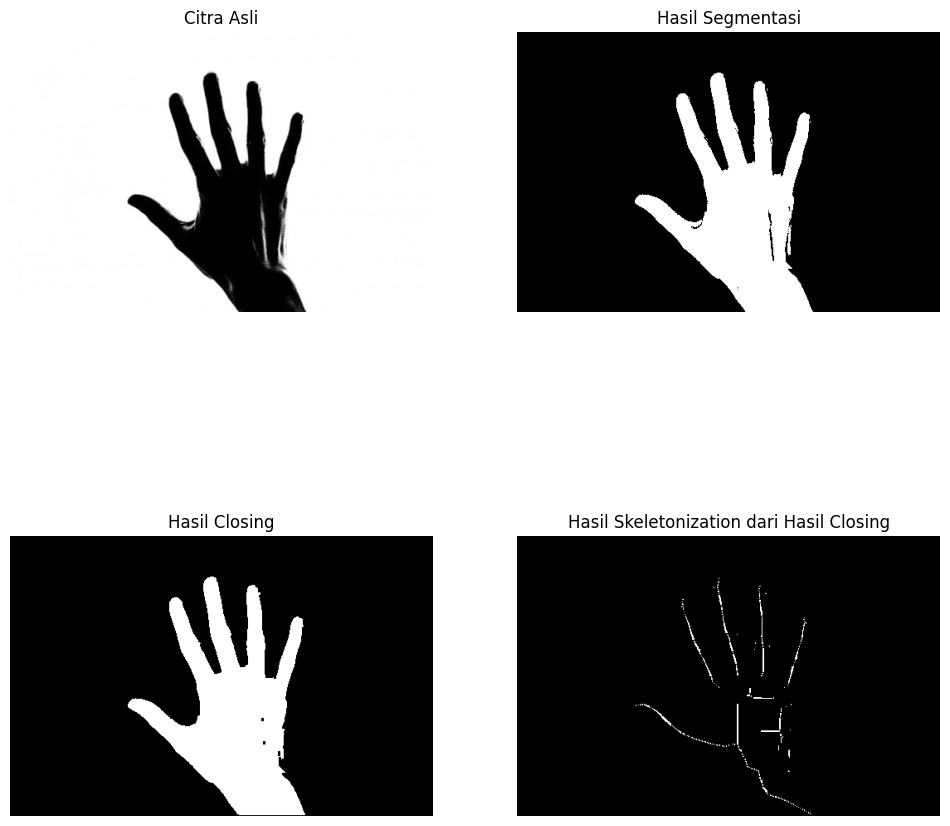

In [ ]:
import matplotlib.pyplot as plt

# Segmentasi citra
optimum_threshold_arr6 = otsu_method(arr6)
segmented_arr6 = segment(arr6, optimum_threshold_arr6, mode='inverse')

# menerapkan thinning dengan berbagai macam kernel
kernel_skel = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
], dtype=np.uint8)

hand_closed = closing(segmented_arr6, kernel_skel)
skeleton_result_img3 = skeletonize(hand_closed, kernel_skel)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0][0].imshow(arr6, cmap='gray')
axs[0][0].set_title('Citra Asli')
axs[0][0].axis('off')

axs[0][1].imshow(segmented_arr6, cmap='gray')
axs[0][1].set_title('Hasil Segmentasi')
axs[0][1].axis('off')

axs[1][0].imshow(hand_closed, cmap='gray')
axs[1][0].set_title('Hasil Closing')
axs[1][0].axis('off')

axs[1][1].imshow(skeleton_result_img3, cmap='gray')
axs[1][1].set_title('Hasil Skeletonization dari Hasil Closing')
axs[1][1].axis('off')

plt.show()


Citra di atas disegmentasi terlebih dulu menjadi citra biner. Karena ada beberapa holes di beberapa bagian foreground, maka saya kenakan operasi closing untuk mengecilkan holes tersebut.

Setelah itu, hasil closing diproses menggunakan skeletonization hingga menghasilkan "skeleton" dari object tangan.

Hasil skeletonization masih belum sempurna karena terdapat sisa holes dan cekungan di citra hasil closing.